In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [31]:
train.head(0)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [4]:
TOXIC = 'toxic'
S_TOXIC = 'severe_toxic'
OBSCENE = 'obscene'
THREAT = 'threat'
INSULT = 'insult'
I_HATE = 'identity_hate'
ys = [TOXIC, S_TOXIC, OBSCENE, THREAT, INSULT, I_HATE]

In [11]:
for y_l in ys:
    print('Label',y_l)
    print(train[train[y_l]==1].sample(5)['comment_text'].values)
    print()

Label toxic
['I never edit on wikipedia!!!!! What the f*ck are you doing , Bbb23 , you s*n of b*ch of b*stard'
 'gonna get you... \n\n...you giant twat faced prick!!! 86.179.113.103'
 "Hey \n\nAnd you're telling me that without a greeting with welcome or something you animal!"
 "citation needed. \n\nWhy are they're little kids on here who need information if the song was the greatest gainer in Canada? How dumb."
 "ooh I'M SCARED!  FUCK YOU"]

Label severe_toxic
['Hi, you poor twerps. My money does far more good than your pathetic rule enforcing. Have fun with your fat wives and gay hookers.'
 'hELLO, TIPTOY, I HOPE YOU DIE. YOU ARE BEING SUCH A FREAKIN JEW, AND PLEASE, PLEASE GET OFF YOUR FATASS AND STOP MASTURBATING, BECAUSE ITS REALLY GETTING BAD. THE SEMINAL FLUID IS EVERYWHERE, BUT THEN AGAIN, I GUESS YOU LIKE IT THAT WAY, YOU FATASS MOTHER F****ER. GET A F***ING LIFE, AND GO FUCK YOURSELF, (YOU PROBABLY DO ANYWAY)'
 "Someone should have told you by now, if you stop sucking so many

In [26]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(train[ys].T, metric = "hamming")
# optionally convert it to a DataFrame
jac_sim = pd.DataFrame(jac_sim, index=ys, columns=ys)
jac_sim

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.914151,0.950549,0.906788,0.946839,0.911669
severe_toxic,0.914151,1.000000,0.956070,0.988413,0.957824,0.985123
obscene,0.950549,0.956070,1.000000,0.947829,0.974833,0.951182
threat,0.906788,0.988413,0.947829,1.000000,0.951489,0.989428
insult,0.946839,0.957824,0.974833,0.951489,1.000000,0.956371
identity_hate,0.911669,0.985123,0.951182,0.989428,0.956371,1.000000


In [47]:

import math
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [98]:
print(train[ys].sum())
print()
for i,a in enumerate(ys):
    only = train
    for j,b in enumerate(ys):
        if i != j:
            only = only[only[a] & (only[b]==0)]
    print('only {} label'.format(a),only.shape[0])
    
print()
for i,a in enumerate(ys):
    for j,b in enumerate(ys):
        if i<j:
            print(a,'vs',b, (train[a] & train[b]).sum(), 'none',b,(train[a] & ~train[b]).sum())

toxic            15294
severe_toxic     1595 
obscene          8449 
threat           478  
insult           7877 
identity_hate    1405 
dtype: int64

only toxic label 5666
only severe_toxic label 0
only obscene label 317
only threat label 22
only insult label 301
only identity_hate label 54

toxic vs severe_toxic 1595 none severe_toxic 13699
toxic vs obscene 7926 none obscene 7368
toxic vs threat 449 none threat 14845
toxic vs insult 7344 none insult 7950
toxic vs identity_hate 1302 none identity_hate 13992
severe_toxic vs obscene 1517 none obscene 78
severe_toxic vs threat 112 none threat 1483
severe_toxic vs insult 1371 none insult 224
severe_toxic vs identity_hate 313 none identity_hate 1282
obscene vs threat 301 none threat 8148
obscene vs insult 6155 none insult 2294
obscene vs identity_hate 1032 none identity_hate 7417
threat vs insult 307 none insult 171
threat vs identity_hate 98 none identity_hate 380
insult vs identity_hate 1160 none identity_hate 6717


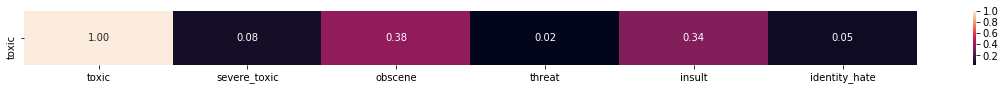

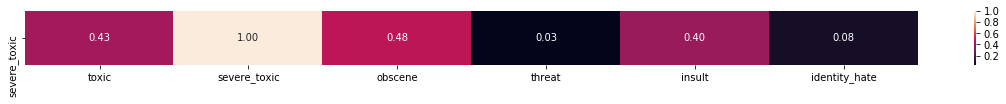

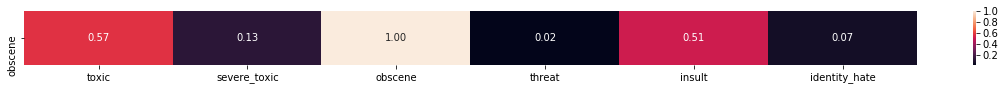

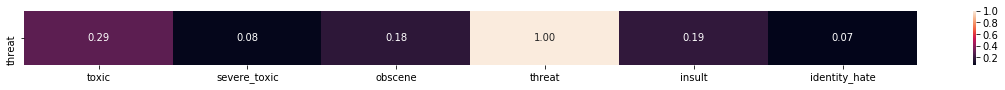

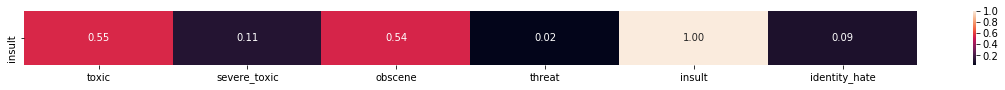

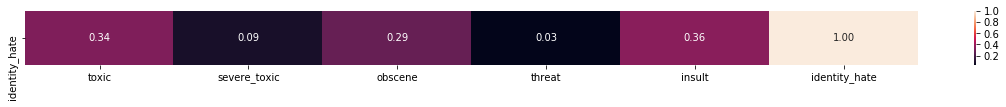

In [57]:
for y_l in ys:
    theilu = pd.DataFrame(index=[y_l],columns=ys)
    columns = ys
    for j in range(0,len(columns)):
        u = theil_u(train[y_l].tolist(),train[columns[j]].tolist())
        theilu.loc[:,columns[j]] = u
    theilu.fillna(value=np.nan,inplace=True)
    plt.figure(figsize=(20,1))
    sns.heatmap(theilu,annot=True,fmt='.2f')
    plt.show()

In [ ]:
train[ys].plot(kind='bar')

In [ ]:
print('toxic',train[(train['toxic'] == 1) & (train['severe_toxic']==0)].shape[0],'vs',train[(train['toxic'] == 1) & (train['severe_toxic']==1)].shape[0])

In [ ]:
train[train['toxic'] == 1].sample(10)

In [ ]:
from util import labels, clean

In [ ]:
value_count = [train[label].value_counts()[1] for label in labels]
pd.DataFrame({'count':value_count}, index=labels).plot.pie(y='count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(stop_words='english').fit(train['comment_text'].append(test['comment_text']))

In [ ]:
len(vect.vocabulary_)

In [ ]:
train['comment_text'] = train['comment_text'].apply(clean)
test['comment_text'] = test['comment_text'].apply(clean)

In [ ]:
vect = CountVectorizer(stop_words='english').fit(train['comment_text'].append(test['comment_text']))

In [ ]:
len(vect.vocabulary_)

In [ ]:
train.to_csv('./data/train_cleaned.csv', index=False)
test.to_csv('./data/test_cleaned.csv', index=False)